# Test CMB lensing covariance 

We first test to run the default TJPCov parameter file, with the DES configuration. We then test with our custom parameter file. 

In [1]:
import sacc
from sacc import data_types
import numpy as np
import os
import tjpcov
from tjpcov.covariance_calculator import CovarianceCalculator

from matplotlib import pyplot as plt

In [2]:
notebook_dir = os.getcwd()

In [3]:
tjpcov_dir = os.path.dirname(os.path.dirname(tjpcov.__file__))

In [4]:
fn_ccl_sacc = os.path.join(tjpcov_dir, 'tests/benchmarks/32_DES_tjpcov_bm/cls_cov_as_txpipe.fits')
s = sacc.Sacc.load_fits(fn_ccl_sacc)

dts = s.get_data_types()

# for dt in dts:
#     print(dt)
#     tracer_sets = s.get_tracer_combinations(dt)
#     print(tracer_sets)

    
for n, t in s.tracers.items():
    print(t.name, t.quantity, type(t))
    
# Type of power spectra
data_types = np.unique([d.data_type for d in s.data])
print("Data types: ", data_types)

# Tracer combinations
print("Tracer combinations: ", s.get_tracer_combinations())

# Data size
print("Size: ", s.mean.size)

DESgc__0 galaxy_density <class 'sacc.tracers.NZTracer'>
DESwl__0 galaxy_shear <class 'sacc.tracers.NZTracer'>
DESwl__1 galaxy_shear <class 'sacc.tracers.NZTracer'>
Data types:  ['cl_00' 'cl_0b' 'cl_0e' 'cl_bb' 'cl_be' 'cl_eb' 'cl_ee']
Tracer combinations:  [('DESgc__0', 'DESgc__0'), ('DESgc__0', 'DESwl__0'), ('DESgc__0', 'DESwl__1'), ('DESwl__0', 'DESwl__0'), ('DESwl__0', 'DESwl__1'), ('DESwl__1', 'DESwl__1')]
Size:  240


In [5]:
# config_yml = 'tests/data/conf_covariance_calculator.yml'
config_yml = os.path.join(tjpcov_dir, 'tests/data/conf_covariance_calculator.yml')
cc = CovarianceCalculator(config_yml)


In [6]:
# The TJPCOV default DES covariance needs to be computed 
# inside the TJPCov directory as it uses sometimes relative paths

%cd {tjpcov_dir}

/Users/louis/Code/TJPCov


In [7]:
cov = cc.get_covariance()

Computing independent covariance blocks
Computing the blocks for independent workspaces
('DESgc__0', 'DESgc__0') ('DESgc__0', 'DESgc__0')
Loading saved covariance tests/tmp/cov_DESgc__0_DESgc__0_DESgc__0_DESgc__0.npz
('DESgc__0', 'DESwl__0') ('DESgc__0', 'DESwl__0')
Loading saved covariance tests/tmp/cov_DESgc__0_DESwl__0_DESgc__0_DESwl__0.npz
('DESgc__0', 'DESwl__1') ('DESgc__0', 'DESwl__1')
Loading saved covariance tests/tmp/cov_DESgc__0_DESwl__1_DESgc__0_DESwl__1.npz
('DESwl__0', 'DESwl__0') ('DESwl__0', 'DESwl__0')
Loading saved covariance tests/tmp/cov_DESwl__0_DESwl__0_DESwl__0_DESwl__0.npz
('DESwl__0', 'DESwl__1') ('DESwl__0', 'DESwl__1')
Loading saved covariance tests/tmp/cov_DESwl__0_DESwl__1_DESwl__0_DESwl__1.npz
('DESwl__1', 'DESwl__1') ('DESwl__1', 'DESwl__1')
Loading saved covariance tests/tmp/cov_DESwl__1_DESwl__1_DESwl__1_DESwl__1.npz
Computing the blocks for independent covariance workspaces
('DESgc__0', 'DESgc__0') ('DESgc__0', 'DESwl__0')
Loading saved covariance test

/opt/miniconda3/envs/tjpcov0p4/lib/python3.11/site-packages/sacc/sacc.py:378: UserWarning: Empty index selected - maybe you should check the tracer order?
  warnings.warn("Empty index selected - maybe you "


('DESgc__0', 'DESwl__1') ('DESwl__1', 'DESwl__1')
Loading saved covariance tests/tmp/cov_DESgc__0_DESwl__1_DESwl__1_DESwl__1.npz
('DESwl__0', 'DESwl__0') ('DESwl__0', 'DESwl__1')
Loading saved covariance tests/tmp/cov_DESwl__0_DESwl__0_DESwl__0_DESwl__1.npz
('DESwl__0', 'DESwl__0') ('DESwl__1', 'DESwl__1')
Loading saved covariance tests/tmp/cov_DESwl__0_DESwl__0_DESwl__1_DESwl__1.npz
('DESwl__0', 'DESwl__1') ('DESwl__1', 'DESwl__1')
Loading saved covariance tests/tmp/cov_DESwl__0_DESwl__1_DESwl__1_DESwl__1.npz
Computing the remaining blocks
Building the covariance: placing blocks in their place
('DESgc__0', 'DESgc__0') ('DESgc__0', 'DESgc__0')
('DESgc__0', 'DESwl__0') ('DESgc__0', 'DESwl__0')
('DESgc__0', 'DESwl__1') ('DESgc__0', 'DESwl__1')
('DESwl__0', 'DESwl__0') ('DESwl__0', 'DESwl__0')
('DESwl__0', 'DESwl__1') ('DESwl__0', 'DESwl__1')
('DESwl__1', 'DESwl__1') ('DESwl__1', 'DESwl__1')
('DESgc__0', 'DESgc__0') ('DESgc__0', 'DESwl__0')
('DESgc__0', 'DESgc__0') ('DESgc__0', 'DESwl__1'

/var/folders/k2/pz579q490y94_cj44cpv_5l80000gn/T/ipykernel_33677/609981110.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(cov)))


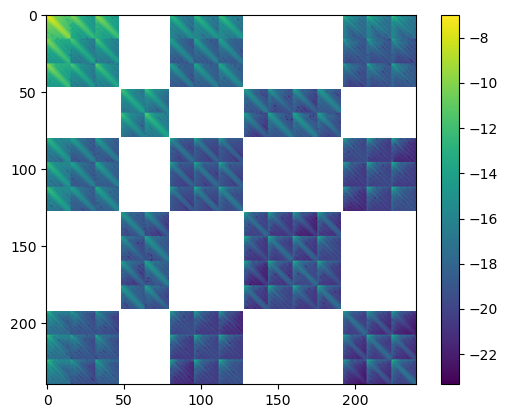

In [8]:
plt.imshow(np.log10(np.abs(cov)))
plt.colorbar()
plt.show()

## Now we use with our custom parameter file

This parameter file is defined in 'conf_covariance_test.yml'. It includes the CMB lensing, galaxy weak lensing and galaxy clustering, each with one redshift bin. 

We tests for now the Gaussian case, with a sky fraction rescaling, so we do not take into account the masks. 

In [9]:
# We go back to the notebook directory to make our tests
%cd {notebook_dir}

/Users/louis/Code/cmblenscov/notebooks


In [10]:
# Sacc file generated from the CMB_LSS_write notebook 

fn_sacc = 'cmblss.fits'
s = sacc.Sacc.load_fits(fn_sacc)
dts = s.get_data_types()

# for dt in dts:
#     print(dt)
#     tracer_sets = s.get_tracer_combinations(dt)
#     print(tracer_sets)

    
for n, t in s.tracers.items():
    print(t.name, t.quantity, type(t))
    
    
# Type of power spectra
data_types = np.unique([d.data_type for d in s.data])
print("Data types: ", data_types)

# Tracer combinations
print("Tracer combinations: ", s.get_tracer_combinations())

# Data size
print("Size: ", s.mean.size)

ck cmb_convergence <class 'sacc.tracers.MapTracer'>
gc galaxy_density <class 'sacc.tracers.NZTracer'>
wl galaxy_shear <class 'sacc.tracers.NZTracer'>
Data types:  ['cl_00' 'cl_0b' 'cl_0e' 'cl_bb' 'cl_eb' 'cl_ee']
Tracer combinations:  [('ck', 'ck'), ('gc', 'ck'), ('gc', 'gc'), ('gc', 'wl'), ('wl', 'ck'), ('wl', 'wl')]
Size:  1000


In [11]:
config_yml = os.path.join(notebook_dir, 'conf_covariance_test.yml')
cc = CovarianceCalculator(config_yml)

In [12]:
cov = cc.get_covariance();


Computing independent covariance blocks
Rank None: ('ck', 'ck'), ('ck', 'ck')


/Users/louis/Code/TJPCov/tjpcov/covariance_builder.py:888: UserWarning: Missing n_ell_coupled info for some tracers in the sacc file. You will have to pass it withthe cache
  warnings.warn(


Rank None: ('ck', 'ck'), ('gc', 'ck')
Rank None: ('ck', 'ck'), ('gc', 'gc')
Rank None: ('ck', 'ck'), ('gc', 'wl')
Rank None: ('ck', 'ck'), ('wl', 'ck')
Rank None: ('ck', 'ck'), ('wl', 'wl')
Rank None: ('gc', 'ck'), ('gc', 'ck')
Rank None: ('gc', 'ck'), ('gc', 'gc')
Rank None: ('gc', 'ck'), ('gc', 'wl')
Rank None: ('gc', 'ck'), ('wl', 'ck')
Rank None: ('gc', 'ck'), ('wl', 'wl')
Rank None: ('gc', 'gc'), ('gc', 'gc')
Rank None: ('gc', 'gc'), ('gc', 'wl')
Rank None: ('gc', 'gc'), ('wl', 'ck')
Rank None: ('gc', 'gc'), ('wl', 'wl')
Rank None: ('gc', 'wl'), ('gc', 'wl')
Rank None: ('gc', 'wl'), ('wl', 'ck')
Rank None: ('gc', 'wl'), ('wl', 'wl')
Rank None: ('wl', 'ck'), ('wl', 'ck')
Rank None: ('wl', 'ck'), ('wl', 'wl')
Rank None: ('wl', 'wl'), ('wl', 'wl')
Building the covariance: placing blocks in their place
('ck', 'ck') ('ck', 'ck')
('ck', 'ck') ('gc', 'ck')
('ck', 'ck') ('gc', 'gc')
('ck', 'ck') ('gc', 'wl')
('ck', 'ck') ('wl', 'ck')
('ck', 'ck') ('wl', 'wl')
('gc', 'ck') ('gc', 'ck')
('g

In [13]:
def cov2corr(cov):
    s = np.sqrt(cov.diagonal())
    return cov/np.outer(s,s)

/var/folders/k2/pz579q490y94_cj44cpv_5l80000gn/T/ipykernel_33677/1023715316.py:3: RuntimeWarning: invalid value encountered in divide
  return cov/np.outer(s,s)


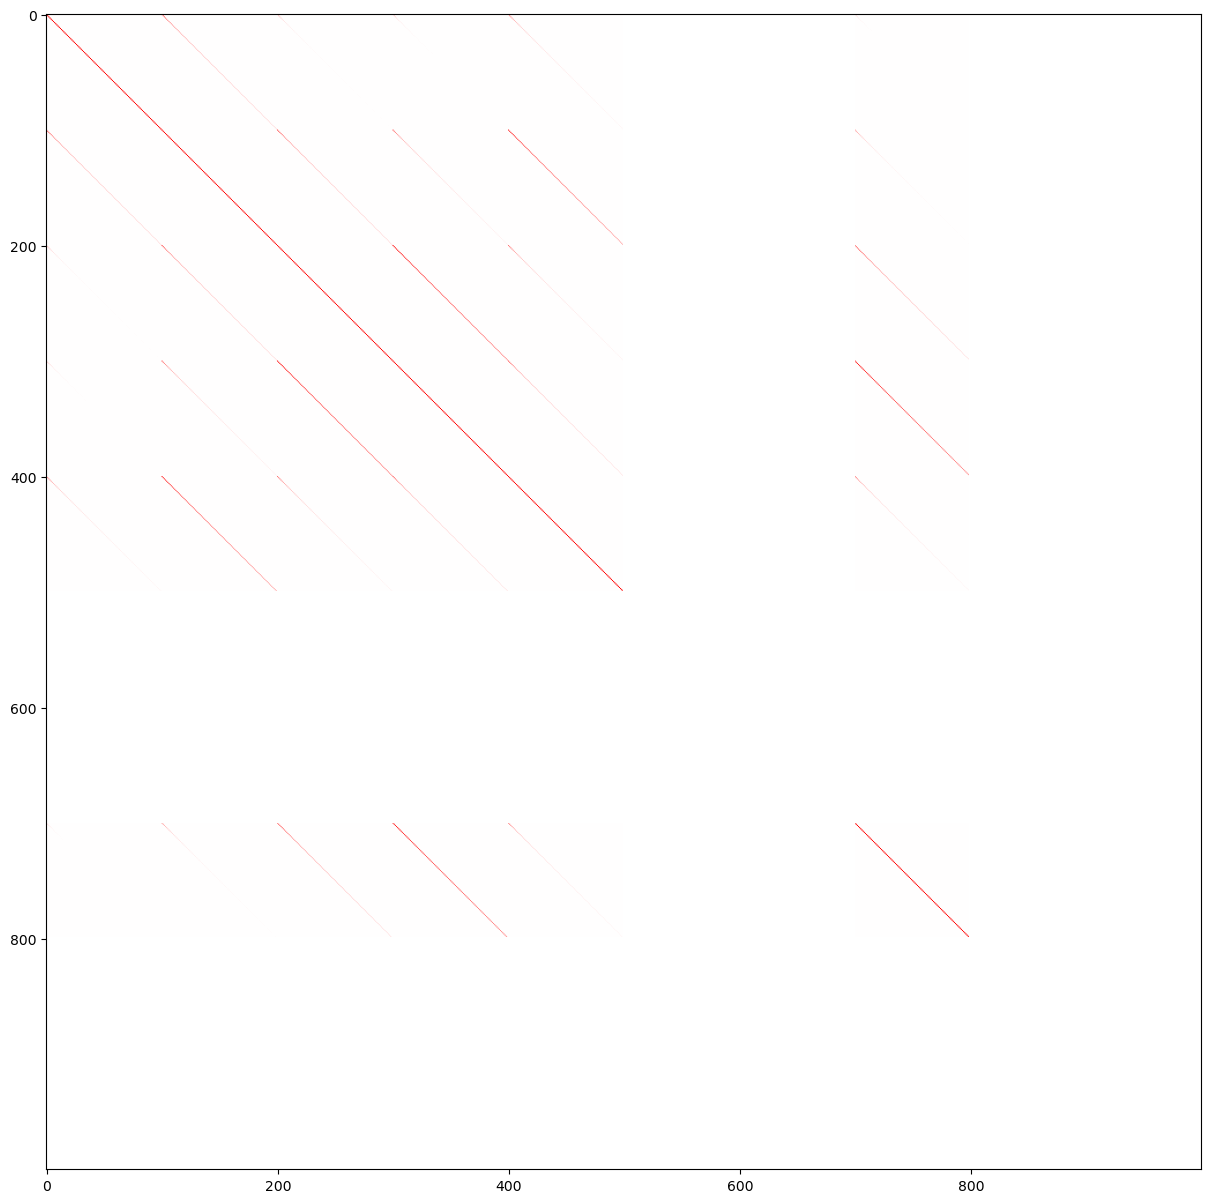

In [14]:
plt.figure(figsize=(15, 15))
plt.imshow(cov2corr(cov), vmin=-1, vmax=1, cmap='bwr')